In [1]:
import turicreate as tc

# Load a common image analysis dataset

In [2]:
image_train = tc.SFrame("image_train_data\image_train_data\m_504edbda459b24ff.frame_idx")

In [3]:
image_test = tc.SFrame("image_test_data\image_test_data\m_e16f5ffd2c088370.frame_idx")

# Exploring the image data

,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

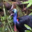
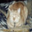
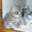
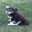
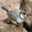
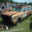
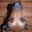
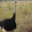
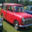
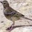

In [14]:
image_train['image'].head().explore()

# Train a Classifier on the raw image pixels

In [7]:
raw_pixel_model = tc.logistic_classifier.create(image_train, target = 'label',
                                               features=['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.014528  | 1.293131     | 0.261029          | 0.178218            |

| 1         | 11       | 4.954029  | 1.597900     | 0.417542          | 0.425743            |

| 2         | 12       | 4.954029  | 1.710249     | 0.405462          | 0.415842            |

| 3         | 19       | 0.431659  | 2.046111     | 0.438550          | 0.455446            |

| 4         | 26       | 5.480081  | 2.391449     | 0.431723          | 0.435644            |

| 9         | 32       | 1.342998  | 2.976317     | 0.529412          | 0.554455            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make a prediction with the simple model based on raw pixels

,SArray
0,
1,
2,

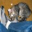
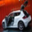
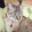

In [11]:
image_test[0:3]['image'].explore()

In [15]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [16]:
raw_pixel_model.predict(image_test[0:3])

dtype: str
Rows: 3
['bird', 'cat', 'bird']

# Evaluating raw pixel model on test data

In [17]:
raw_pixel_model.evaluate(image_test)

{'accuracy': 0.4855,
 'auc': 0.7254773749999999,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   85  |
 |     cat      |       cat       |  308  |
 |     bird     |    automobile   |  102  |
 |  automobile  |    automobile   |  616  |
 |     dog      |       bird      |  302  |
 |     cat      |    automobile   |  132  |
 |     dog      |       dog       |  404  |
 |     cat      |       dog       |  298  |
 |     bird     |       cat       |  132  |
 |     dog      |       cat       |  209  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.48084095402072535,
 'log_loss': 1.2091243673984147,
 'precisio

# Can we improve the model using deep features?

In [18]:
len(image_train)

2005

In [21]:
## we already did this step and we have the deep_features col
#deep_learning_model = tc.load_model('imagenet_model')
#image_train['deep_features'] = deep_learning_model.extract_features(image_train)

In [22]:
image_train.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


# Given the deep features, let's train a classifier 

In [25]:
deep_features_model = tc.logistic_classifier.create(image_train,
                                                   features=['deep_features'],
                                                   target='label')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.204475     | 0.750525          | 0.831683            |

| 1         | 6        | 0.250000  | 0.538216     | 0.761029          | 0.801980            |

| 2         | 9        | 0.216712  | 0.873576     | 0.770483          | 0.841584            |

| 3         | 13       | 0.650137  | 1.158393     | 0.784139          | 0.831683            |

| 4         | 14       | 0.812671  | 1.292409     | 0.809874          | 0.861386            |

| 9         | 20       | 1.000000  | 2.098450     | 0.910714          | 0.881188            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Apply the deep features model to the first few images of test set

,SArray
0,
1,
2,

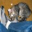
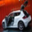
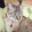

In [26]:
image_test[0:3]['image'].explorelore()

In [27]:
deep_features_model.predict(image_test[0:3])

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

# Compute test_data accuracy of deep_features_model

In [28]:
deep_features_model.evaluate(image_test)

{'accuracy': 0.79375,
 'auc': 0.9419892500000004,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |       cat       |  232  |
 |     bird     |       bird      |  793  |
 |  automobile  |       bird      |   15  |
 |  automobile  |    automobile   |  951  |
 |     bird     |    automobile   |   15  |
 |     cat      |       cat       |  718  |
 |     bird     |       cat       |  139  |
 |     cat      |       dog       |  206  |
 |     dog      |       dog       |  713  |
 |     dog      |    automobile   |   10  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7957173500328658,
 'log_loss': 0.5971154107840594,
 'precisio